This dataset includes the information regarding all of the TED talks that were uploaded to the official website <a href="https://www.ted.com/" target="_blank">TED.com</a> before Sep. 21, 2017.

First, let's have a look at the dataset, do some necessary cleaning and see what insights we can get from the analysis.

In [2]:
#import libraries

%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [151]:
#load the dataset
ted = pd.read_csv('data/ted_main.csv')

# check the dimension of the dataset
print(f'The dataset has {ted.shape[0]} rows and {ted.shape[1]} columns.')

The dataset has 2550 rows and 17 columns.


In [152]:
#rearrange the order of the columns in the dataset
ted = ted[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [5]:
#check the cloumns
ted.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

In [6]:
ted.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


We can see that the film_date and publish_date are encoded in Unix timestamp. We will use the `datetime` module to convert it to human readable datetime formats.

In [153]:
#convert film_date and publish_date
import datetime
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

The current dataset looks like below after the initial cleaning:

In [8]:
ted.head(2)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,24-02-2006,26-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520


### check the data quality

In [10]:
# check nulls
ted.isnull().any()

name                  False
title                 False
description           False
main_speaker          False
speaker_occupation     True
num_speaker           False
duration              False
event                 False
film_date             False
published_date        False
comments              False
tags                  False
languages             False
ratings               False
related_talks         False
url                   False
views                 False
dtype: bool

In [154]:
# check the null in the speaker_occupation column
ted[ted['speaker_occupation'].isnull()]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
1113,Sonaar Luthra: Meet the Water Canary,Meet the Water Canary,"After a crisis, how can we tell if water is sa...",Sonaar Luthra,NaN,1,217,TEDGlobal 2011,13-07-2011,16-01-2012,145,"['TED Fellows', 'design', 'global development'...",38,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,Rick Falkvinge: I am a pirate,I am a pirate,"The Pirate Party fights for transparency, anon...",Rick Falkvinge,NaN,1,1097,TEDxObserver,10-03-2012,01-04-2012,122,"['Internet', 'TEDx', 'global issues', 'politic...",10,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,Gary Kovacs: Tracking our online trackers,Tracking our online trackers,"As you surf the Web, information is being coll...",Gary Kovacs,NaN,1,399,TED2012,28-02-2012,03-05-2012,257,"['Internet', 'advertising', 'business', 'priva...",32,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,Ryan Holladay: To hear this music you have to ...,To hear this music you have to be there. Liter...,"In this lovely talk, TED Fellow Ryan Holladay ...",Ryan Holladay,NaN,1,389,TED@BCG San Francisco,29-10-2013,10-01-2014,140,"['TED Fellows', 'entertainment', 'music', 'tec...",33,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,Brian Dettmer: Old books reborn as art,Old books reborn as art,What do you do with an outdated encyclopedia i...,Brian Dettmer,NaN,1,366,TEDYouth 2014,03-11-2014,06-02-2015,48,"['TEDYouth', 'art', 'books', 'creativity']",34,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,Boniface Mwangi: The day I stood up alone,The day I stood up alone,Photographer Boniface Mwangi wanted to protest...,Boniface Mwangi,NaN,1,440,TEDGlobal 2014,19-10-2014,02-04-2015,70,"['TED Fellows', 'activism', 'art', 'corruption...",33,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/boniface_mwangi_boni...,1342431


There are 6 nulls in 'speaker_occupation' column and no nulls in other columns. It should have no much impact in the later analysis.

### the descriptive analysis of the numeric data

In [12]:
ted.describe()

,num_speaker,duration,comments,languages,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,6404.000000,72.000000,4.722711e+07


In [13]:
# the proportion of a single speaker
print('The number of talks of a single speaker makes up {}% of all the talks.'. format(round(sum(ted['num_speaker']==1)*100/len(ted),1)))
# the proportion of talks that are less than 18 minutes
print('The number of talks that are less than 18 minutes makes up {}% of all the talks.'. format(round(sum(ted['duration']<= 18*60)*100/len(ted),1)))

The number of talks of a single speaker makes up 97.7% of all the talks.
The number of talks that are less than 18 minutes makes up 79.1% of all the talks.


### the initial observations

* The number of speakers range between 1 and 5, most(97.7%)are made up of single speakers.
* The duration of talks are between 135 seconds and 5256 seconds, which are 2- 88 minutes. 79.1% are less than 18 minutes.
* The number of comments range between 2 and 6404, averaging 191.5
* The views range between 50,000 and 47,000,000, averaging 1,700,000.
* TED makes several languages avaliable, 72 at most.

### What was everyone watching? -- the 10 most viewed TED talks

In [14]:
top10 = ted.sort_values('views', ascending = False).head(10)
top10

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,"Body language affects how others see us, but i...",Amy Cuddy,Social psychologist,1,1262,TEDGlobal 2012,25-06-2012,01-10-2012,2290,"['body language', 'brain', 'business', 'psycho...",51,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
677,Simon Sinek: How great leaders inspire action,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,Simon Sinek,Leadership expert,1,1084,TEDxPuget Sound,16-09-2009,04-05-2010,1930,"['TEDx', 'business', 'entrepreneur', 'leadersh...",45,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/simon_sinek_how_grea...,34309432
837,Brené Brown: The power of vulnerability,The power of vulnerability,Brené Brown studies human connection -- our ab...,Brené Brown,Vulnerability researcher,1,1219,TEDxHouston,05-06-2010,23-12-2010,1927,"['TEDx', 'communication', 'culture', 'depressi...",52,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/brene_brown_on_vulne...,31168150
452,Mary Roach: 10 things you didn't know about or...,10 things you didn't know about orgasm,"""Bonk"" author Mary Roach delves into obscure s...",Mary Roach,Writer,1,1003,TED2009,05-02-2009,19-05-2009,354,"['books', 'culture', 'history', 'humor', 'scie...",37,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/mary_roach_10_things...,22270883
1776,Julian Treasure: How to speak so that people w...,How to speak so that people want to listen,"Have you ever felt like you're talking, but no...",Julian Treasure,Sound consultant,1,598,TEDGlobal 2013,09-06-2013,27-06-2014,297,"['culture', 'sound', 'speech']",45,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/julian_treasure_how_...,21594632
201,Jill Bolte Taylor: My stroke of insight,My stroke of insight,Jill Bolte Taylor got a research opportunity f...,Jill Bolte Taylor,Neuroanatomist,1,1099,TED2008,26-02-2008,11-03-2008,2877,"['biology', 'brain', 'consciousness', 'global ...",49,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
5,Tony Robbins: Why we do what we do,Why we do what we do,"Tony Robbins discusses the ""invisible forces"" ...",Tony Robbins,Life coach; expert in leadership psychology,1,1305,TED2006,01-02-2006,27-06-2006,672,"['business', 'culture', 'entertainment', 'goal...",36,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
2114,James Veitch: This is what happens when you re...,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",James Veitch,Comedian and writer,1,588,TEDGlobal>Geneva,07-12-2015,08-01-2016,150,"['comedy', 'communication', 'curiosity', 'humo...",43,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/james_veitch_t

Text(0, 0.5, 'Views')

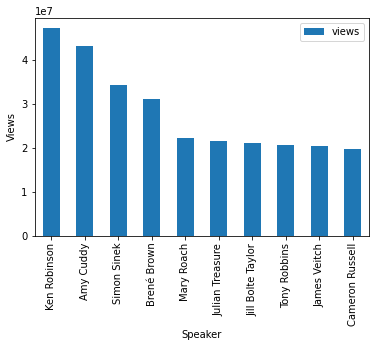

In [15]:
# a bar plot
top10.plot('main_speaker', 'views', kind='bar')
plt.xlabel('Speaker')
plt.ylabel('Views')


Next, we're going to take a look at the views distribution overall.

In [16]:
ted['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

<AxesSubplot:xlabel='views'>

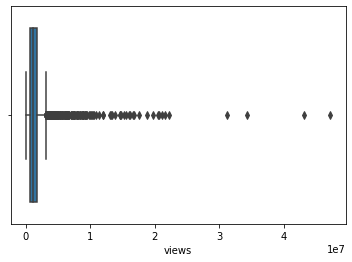

In [17]:
# boxplot
sns.boxplot(x=ted['views'])

c:\users\wensh\pycharmprojects\dataanalysis\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

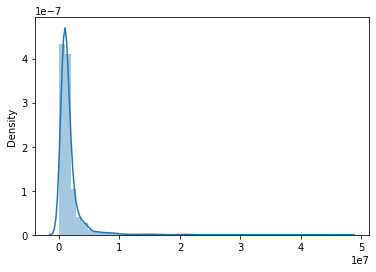

In [18]:
# distribution
sns.distplot(x=ted['views'])

In [19]:
# views that are less than 4 million
print('The number of talks that have views less than 4 million make up {}% of all the talks.'. format(round(sum(ted["views"] <= 4000000)*100/len(ted), 1)))

The number of talks that have views less than 4 million make up 93.5% of all the talks.


The mean of the views is 1.7 million, the median is 1.1 million. It shows that the TED talks are popular.
93.5% of the talks have views less than 4 million. Therefore, we're going to plot the distribution of the talks that have views less than 4 million.

c:\users\wensh\pycharmprojects\dataanalysis\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'the distribution of talks with views less than 4 million')

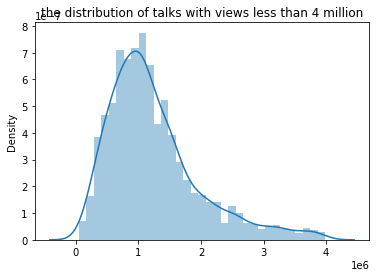

In [20]:
sns.distplot(x=ted[ted['views']<=4000000]['views']).set_title('the distribution of talks with views less than 4 million')

### What was everyone talking about? -- the 10 most discussed TED talks

In [21]:
top_comment = ted.sort_values('comments', ascending = False).head(10)
top_comment

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
96,Richard Dawkins: Militant atheism,Militant atheism,Richard Dawkins urges all atheists to openly s...,Richard Dawkins,Evolutionary biologist,1,1750,TED2002,01-02-2002,15-04-2007,6404,"['God', 'atheism', 'culture', 'religion', 'sci...",42,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/richard_dawkins_on_m...,4374792
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
644,Sam Harris: Science can answer moral questions,Science can answer moral questions,"Questions of good and evil, right and wrong ar...",Sam Harris,"Neuroscientist, philosopher",1,1386,TED2010,10-02-2010,22-03-2010,3356,"['culture', 'evolutionary psychology', 'global...",39,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sam_harris_science_c...,3433437
201,Jill Bolte Taylor: My stroke of insight,My stroke of insight,Jill Bolte Taylor got a research opportunity f...,Jill Bolte Taylor,Neuroanatomist,1,1099,TED2008,26-02-2008,11-03-2008,2877,"['biology', 'brain', 'consciousness', 'global ...",49,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
1787,David Chalmers: How do you explain consciousness?,How do you explain consciousness?,Our consciousness is a fundamental aspect of o...,David Chalmers,Philosopher,1,1117,TED2014,17-03-2014,14-07-2014,2673,"['brain', 'consciousness', 'neuroscience', 'ph...",33,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_chalmers_how_d...,2162764
954,Janet Echelman: Taking imagination seriously,Taking imagination seriously,Janet Echelman found her true voice as an arti...,Janet Echelman,Artist,1,566,TED2011,02-03-2011,07-06-2011,2492,"['art', 'cities', 'culture', 'data', 'design',...",35,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/janet_echelman\n,1832930
840,Lesley Hazleton: On reading the Koran,On reading the Koran,Lesley Hazleton sat down one day to read the K...,Lesley Hazleton,"Writer, psychologist",1,573,TEDxRainier,09-10-2010,04-01-2011,2374,"['TEDx', 'culture', 'global issues', 'journali...",35,"[{'id': 3, 'name': 'Courageous', 'count': 488}...","[{'id': 1772, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/lesley_hazelton_on_r...,1847256
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,"Body language affects how others see us, but i...",Amy Cuddy,Social psychologist,1,1262,TEDGlobal 2012,25-06-2012,01-10-2012,2290,"['body language', 'brain', 'business', 'psycho...",51,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
661,Michael Specter: The danger of science denial,The danger of science denial,"Vaccine-autism claims, ""Frankenfood"" bans, the...",Michael Specter,Writer,1,1141,TED2010,10-02-2010,12-04-2010,2272,"['global issues', 'medicine', 'religion', 'sci...",31,"[{'id': 3, 'name': 'Courageous', 'count': 702}...","[{'id': 801, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/michael_specter_the_...,1838628
677,Simon Sinek: How great leaders inspire action,How great leaders inspire a

Text(0, 0.5, 'the No. of comments')

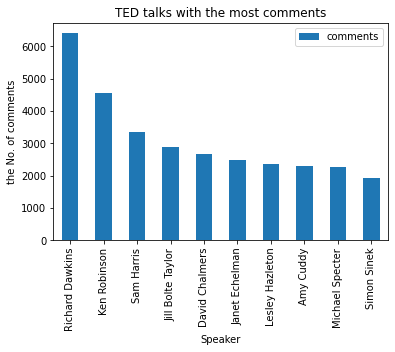

In [22]:
# a bar plot:
top_comment.plot('main_speaker', 'comments', kind = 'bar', title = 'TED talks with the most comments')
plt.xlabel('Speaker')
plt.ylabel('the No. of comments')


In [23]:
# the distribution of the number of comments
ted['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

<AxesSubplot:xlabel='comments'>

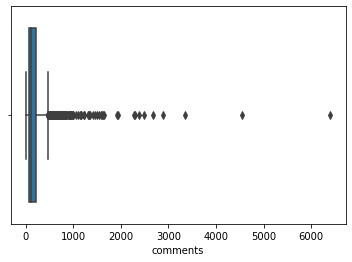

In [24]:
# boxplot
sns.boxplot(x = ted['comments'])

In [28]:
print(f'The number of talks that have comments less than 500: {round(sum(ted["comments"] <= 500)*100/len(ted), 1)}%.')

The number of talks that have comments less than 500: 93.3%.


The average number of comments is 191, the median is 118. It shows that the TED talks are discussed a lot among the audience.
93.3% of the talks have comments less than 500, thus we will plot a distribution with comments within this range.

c:\users\wensh\pycharmprojects\dataanalysis\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Talks with comments less than 500')

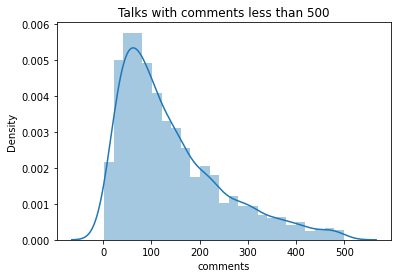

In [29]:
sns.distplot(ted[ted['comments']<500]['comments']).set_title('Talks with comments less than 500')

### views vs comments: are they correlated?

In [31]:
ted[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


The pearson correlation coefficient is 0.53, moderately correlated.

### The most heatly discussed Talks

The above analysis of comments and views has inspired us to dig more out of the most discussed talks.
* What talks can make more viewers participate in the discussion?
Here we will define a new feature: discuss index(discuss index = comments/views*10000). We will list the top 10 talks with highest discuss index.

In [33]:
ted['dis_ind'] = round(ted['comments']/ted['views'] * 10000, 1)

In [36]:
dis_ind = ted.sort_values('dis_ind', ascending = False).head(10)
dis_ind

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,dis_ind
744,Diane J. Savino: The case for same-sex marriage,The case for same-sex marriage,Hours before New York lawmakers rejected a key...,Diane J. Savino,Senator,1,453,New York State Senate,01-12-2009,17-08-2010,649,"['God', 'LGBT', 'culture', 'government', 'law'...",0,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/diane_j_savino_the_c...,292395,22.2
803,David Bismark: E-voting without fraud,E-voting without fraud,David Bismark demos a new system for voting th...,David Bismark,Voting system designer,1,422,TEDGlobal 2010,13-07-2010,02-11-2010,834,"['culture', 'democracy', 'design', 'global iss...",36,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/david_bismark_e_voti...,543551,15.3
96,Richard Dawkins: Militant atheism,Militant atheism,Richard Dawkins urges all atheists to openly s...,Richard Dawkins,Evolutionary biologist,1,1750,TED2002,01-02-2002,15-04-2007,6404,"['God', 'atheism', 'culture', 'religion', 'sci...",42,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/richard_dawkins_on_m...,4374792,14.6
694,Sharmeen Obaid-Chinoy: Inside a school for sui...,Inside a school for suicide bombers,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,Sharmeen Obaid-Chinoy,Filmmaker,1,489,TED2010,09-02-2010,26-05-2010,1502,"['TED Fellows', 'children', 'culture', 'film',...",32,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,14.2
954,Janet Echelman: Taking imagination seriously,Taking imagination seriously,Janet Echelman found her true voice as an arti...,Janet Echelman,Artist,1,566,TED2011,02-03-2011,07-06-2011,2492,"['art', 'cities', 'culture', 'data', 'design',...",35,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/janet_echelman\n,1832930,13.6
840,Lesley Hazleton: On reading the Koran,On reading the Koran,Lesley Hazleton sat down one day to read the K...,Lesley Hazleton,"Writer, psychologist",1,573,TEDxRainier,09-10-2010,04-01-2011,2374,"['TEDx', 'culture', 'global issues', 'journali...",35,"[{'id': 3, 'name': 'Courageous', 'count': 488}...","[{'id': 1772, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/lesley_hazelton_on_r...,1847256,12.9
876,Elizabeth Lindsey: Curating humanity's heritage,Curating humanity's heritage,"It's been said that when an elder dies, it's a...",Elizabeth Lindsey,"Explorer, ethnographer",1,613,TEDWomen 2010,07-12-2010,23-02-2011,555,"['anthropology', 'storytelling']",30,"[{'id': 21, 'name': 'Unconvincing', 'count': 5...","[{'id': 69, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/elizabeth_lindsey_cu...,439180,12.6
661,Michael Specter: The danger of science denial,The danger of science denial,"Vaccine-autism claims, ""Frankenfood"" bans, the...",Michael Specter,Writer,1,1141,TED2010,10-02-2010,12-04-2010,2272,"['global issues', 'medicine', 'religion', 'sci...",31,"[{'id': 3, 'name': 'Courageous', 'count': 702}...","[{'id': 801, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/michael_specter_the_...,1838628,12.4
1787,David Chalmers: How do you explain consciousness?,How do you explain consciousness?,Our consciousness is a fundamental aspect of o...,David Chalmers,Philosopher,1,1117,TED2014,17-03-2014,14-07-2014,2673,"['brain', 'consciousness', 'neuroscience', 'ph...",33,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_chalmers_how_d...,2162764,12.4
561,Mallika Sarabhai: Dance to cha

Text(0, 0.5, 'Discussion index')

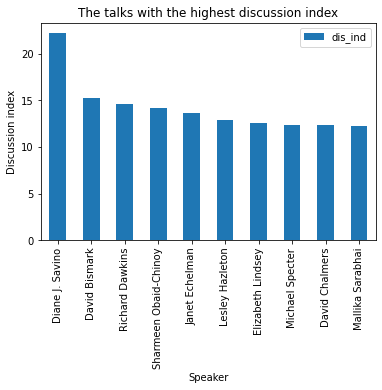

In [38]:
dis_ind.plot('main_speaker', 'dis_ind', title = 'The talks with the highest discussion index', kind = 'bar')
plt.xlabel('Speaker')
plt.ylabel('Discussion index')


Most of the talks with highest discussion index are tagged with religion, science and politics, which are more prone to discussion, compared to culture and arts.

### analyze the talks based on different times

TED conference is held once a year, but TEDx and other small scale activities happen more frequently. How are these talks distributed?

#### based on month

In [39]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [47]:
# add a column of month
ted['month'] = ted['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
month_df = pd.DataFrame(ted['month'].value_counts()).reset_index()


In [49]:
month_df.columns = ['month', 'talks']

<AxesSubplot:title={'center':'the time distribution of TED talks'}, xlabel='month'>

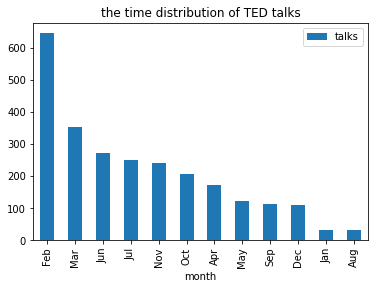

In [50]:
month_df.plot('month', 'talks', title = 'the time distribution of TED talks', kind = 'bar')

We can see that Feb is the month that most talks happen. It may be due to the TED conference. Jan and Aug are the months with least TED talks.

#### based on weeks


In [51]:
# define a function to get the weekdays
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]


In [52]:
# add a column of weekday
ted['day'] = ted['film_date'].apply(getday)

In [53]:
day_df = pd.DataFrame(ted['day'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']

<AxesSubplot:title={'center':'the time distribution of TED talks'}, xlabel='day'>

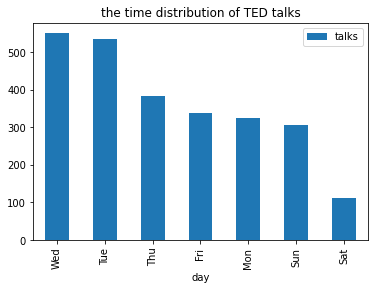

In [54]:
day_df.plot('day', 'talks', title = 'the time distribution of TED talks', kind = 'bar')

It is clear that most talks happen on Wednesdays and Tuesdays. Least talks happen on Saturdays.

#### based on years

In [137]:
# add a column of year
ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(ted['year'].value_counts(ascending = True)).reset_index()
year_df.columns = ['year','talks']



<AxesSubplot:xlabel='year'>

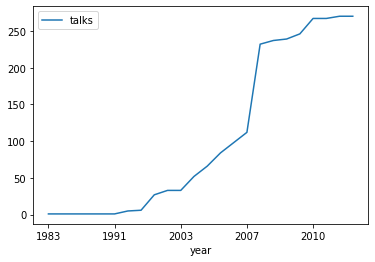

In [142]:
year_df.plot('year', 'talks')


As expected, the number of TED talks in increasing every year.

### the speakers

#### the number of talks the speakers gave

In [144]:
speaker_df = ted.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['speaker', 'No. of talks']
speaker_df = speaker_df.sort_values('No. of talks', ascending = False)
speaker_df.head(10)

,speaker,No. of talks
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


No.1 is Hans Rosling, who is a health expert from Switzerland and gave 9 talks on TED. 
Next, let's have a look what oocupations are popular on TED.

#### the distribution of speakers' occupation

In [145]:
occupation_df = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'No. of talks']
occupation_df = occupation_df.sort_values('No. of talks', ascending = False)

<AxesSubplot:xlabel='occupation'>

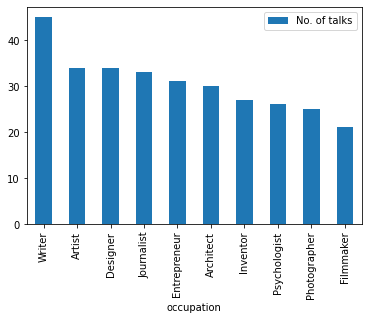

In [147]:
occupation_df.head(10).plot('occupation', 'No. of talks', kind = 'bar')

* Writer is the most popular occupation;
* Comes next is artist and designer, each having approximately 35.

#### views arranged by different occupations

(0.0, 4000000.0)

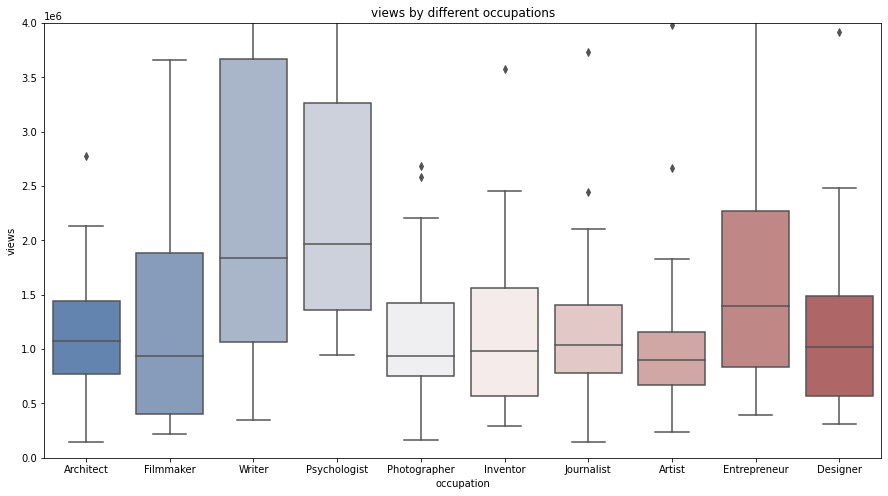

In [148]:
# boxplot
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 8))
ax = sns.boxplot(x = 'speaker_occupation', y = 'views', 
            data = ted[ted['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], 
            palette='vlag', ax = ax)
ax.set_title('views by different occupations')
ax.set_xlabel('occupation')
ax.set_ylabel('views')
ax.set_ylim([0, 0.4e7])


Among the 10 most popular occupations, writer and psychologist atttact more views.

### the subjects of TED talks 

Tags column include talks subjects information. As it's a list, we need to do some cleaning here and extract the tags out of the list.

In [155]:
# convert a list of strings to a list
import ast
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(x))

In [156]:
# original tags
ted['tags'].head()

0    [children, creativity, culture, dance, educati...
1    [alternative energy, cars, climate change, cul...
2    [computers, entertainment, interface design, m...
3    [MacArthur grant, activism, business, cities, ...
4    [Africa, Asia, Google, demo, economics, global...
Name: tags, dtype: object

In [157]:
# split tags
s = ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'
s.head()

0      children
0    creativity
0       culture
0         dance
0     education
Name: theme, dtype: object

In [158]:
# add the split tags to the original dataframe
theme_df = ted.drop('tags', axis = 1).join(s)
theme_df.head(2)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,languages,ratings,related_talks,url,views,theme
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,children
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,creativity


In [164]:
# the number of tags
print(f"The number of tags：{len(theme_df['theme'].value_counts())}")

The number of tags：416


<AxesSubplot:title={'center':'the most popular TED talks tags'}>

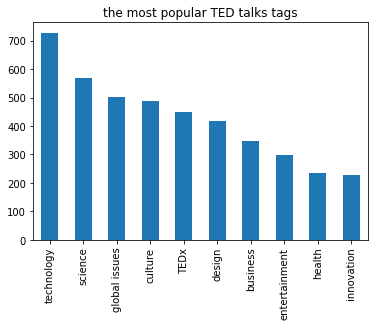

In [176]:
theme_df['theme'].value_counts().head(10).plot(x = 'theme', kind = 'bar', title = 'the most popular TED talks tags')

As expected, technology is the most popular theme, followed by science, global issues and culture.
How have these popular themes developed these days? We selected 7 themes(technology, science, global issues, culture, design, business and entertainment) to analyze.

In [198]:
pop_themes = theme_df['theme'].value_counts().head(10).reset_index()
pop_themes.columns = ['theme', 'number']
pop_themes

,theme,number
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


In [228]:
pop_theme_talks = theme_df[(theme_df['theme'].isin(pop_themes.head(8)['theme'])) & (theme_df['theme'] != 'TEDx')]


In [229]:
pop_theme_talks['year'] = pop_theme_talks['film_date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y').year)

c:\users\wensh\pycharmprojects\dataanalysis\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
pop_theme_talks.head(6)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,languages,ratings,related_talks,url,views,theme,year
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,culture,2006
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,24-02-2006,26-06-2006,265,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,culture,2006
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,24-02-2006,26-06-2006,265,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,global issues,2006
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,24-02-2006,26-06-2006,265,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,science,2006
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,24-02-2006,26-06-2006,265,43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,technology,2006
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,23-02-2006,26-06-2006,124,26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,entertainment,2006


In [232]:
pop_theme_talks = pop_theme_talks[pop_theme_talks['year'] > 2008]

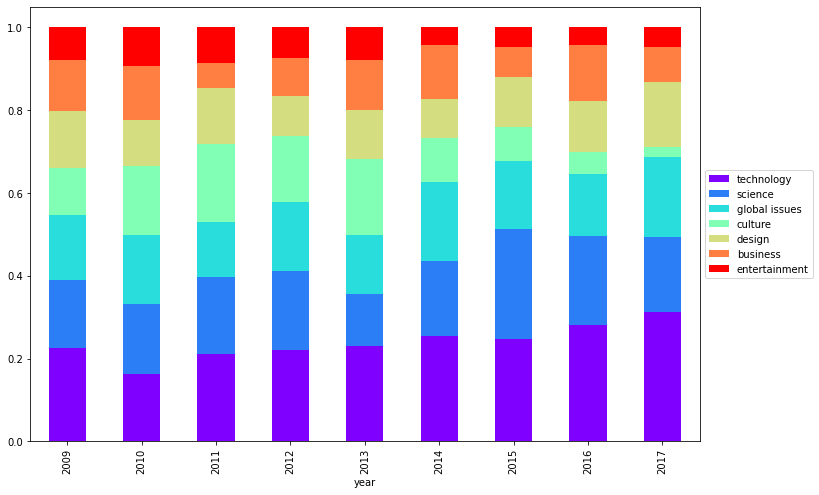

In [233]:
# a bar plot:
themes = list(pop_themes.head(8)['theme'])
themes.remove('TEDx')

ctab = pd.crosstab([pop_theme_talks['year']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

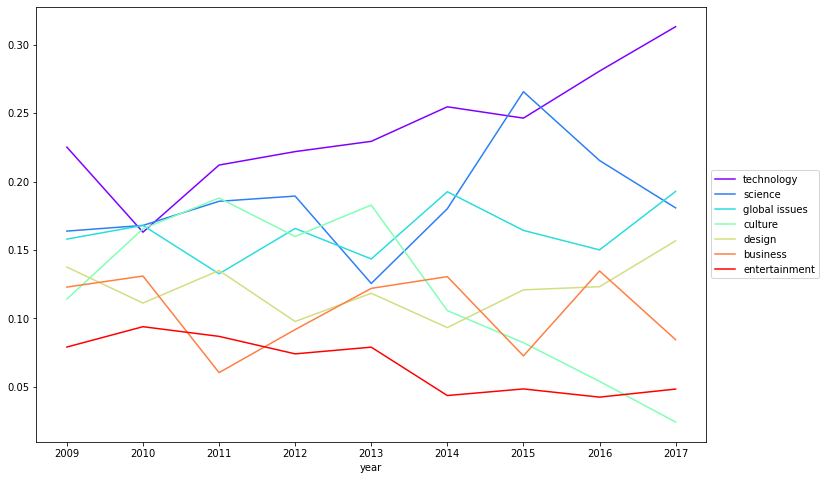

In [235]:
# line plot
ctab[themes].plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

We can see from the plot that the technology theme has increased sharply, which is not a surprise given the rapid progress in AR, blockchain, deep learning etc. In addition, the last few years have seen the steady drop in the entertainment theme. 